In [79]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def show_image(image, title, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.show()
    
def save_image(image, filename):
    to_save = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite(filename, to_save)

In [2]:
def skeleton(img):
    size = np.size(img)
    skeleton = np.zeros(img.shape,np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    finished = False

    while(not finished):
        eroded = cv2.erode(img,kernel)
        temp = cv2.dilate(eroded,kernel)
        temp = cv2.subtract(img,temp)
        skeleton = cv2.bitwise_or(skeleton,temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            finished = True
    return skeleton

In [3]:
def find_skeleton3(img):
    skeleton = np.zeros(img.shape,np.uint8)
    eroded = np.zeros(img.shape,np.uint8)
    temp = np.zeros(img.shape,np.uint8)

    _,thresh = cv2.threshold(img,127,255,0)

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

    iters = 0
    while(True):
        cv2.erode(thresh, kernel, eroded)
        cv2.dilate(eroded, kernel, temp)
        cv2.subtract(thresh, temp, temp)
        cv2.bitwise_or(skeleton, temp, skeleton)
        thresh, eroded = eroded, thresh # Swap instead of copy

        iters += 1
        if cv2.countNonZero(thresh) == 0:
            return skeleton

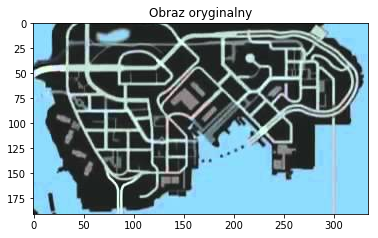

In [60]:
image = load_image('data/3.png')
show_image(image, 'Obraz oryginalny')

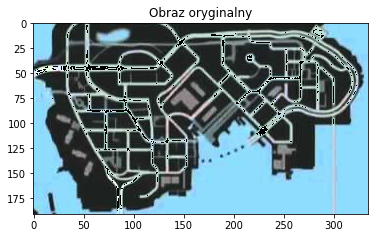

In [90]:
lower_road = np.array([190,230,215])
upper_road = np.array([230,260,250])
    
mask = cv2.inRange(image, lower_road, upper_road)
mask = cv2.bitwise_not(mask)
#kernel = np.ones((2,2),np.uint8)
#mask = cv2.erode(mask, kernel, iterations=3)
res = cv2.bitwise_and(image, image, mask= mask)
show_image(res, 'Obraz oryginalny')
save_image(res, "res.png")

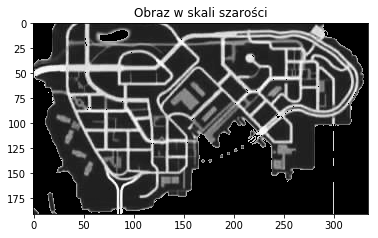

In [48]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(image_gray, 'Obraz w skali szarości', cmap='gray')

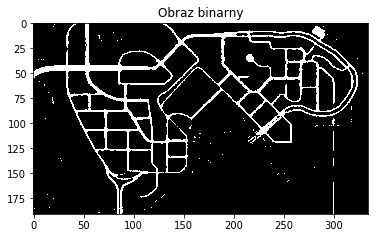

In [49]:
_, image_binary = cv2.threshold(image_gray, 180, 255, cv2.THRESH_BINARY)
show_image(image_binary, 'Obraz binarny', cmap='gray')

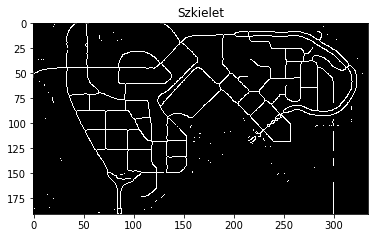

In [50]:
#sk = find_skeleton3(image_binary)
sk = cv2.ximgproc.thinning(image_binary,thinningType = cv2.ximgproc.THINNING_ZHANGSUEN)
show_image(sk, "Szkielet", cmap='gray')